# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [18]:
df = df.drop(['diagnosis', 'Unnamed: 32'], axis=1)
df.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


KeyboardInterrupt: 

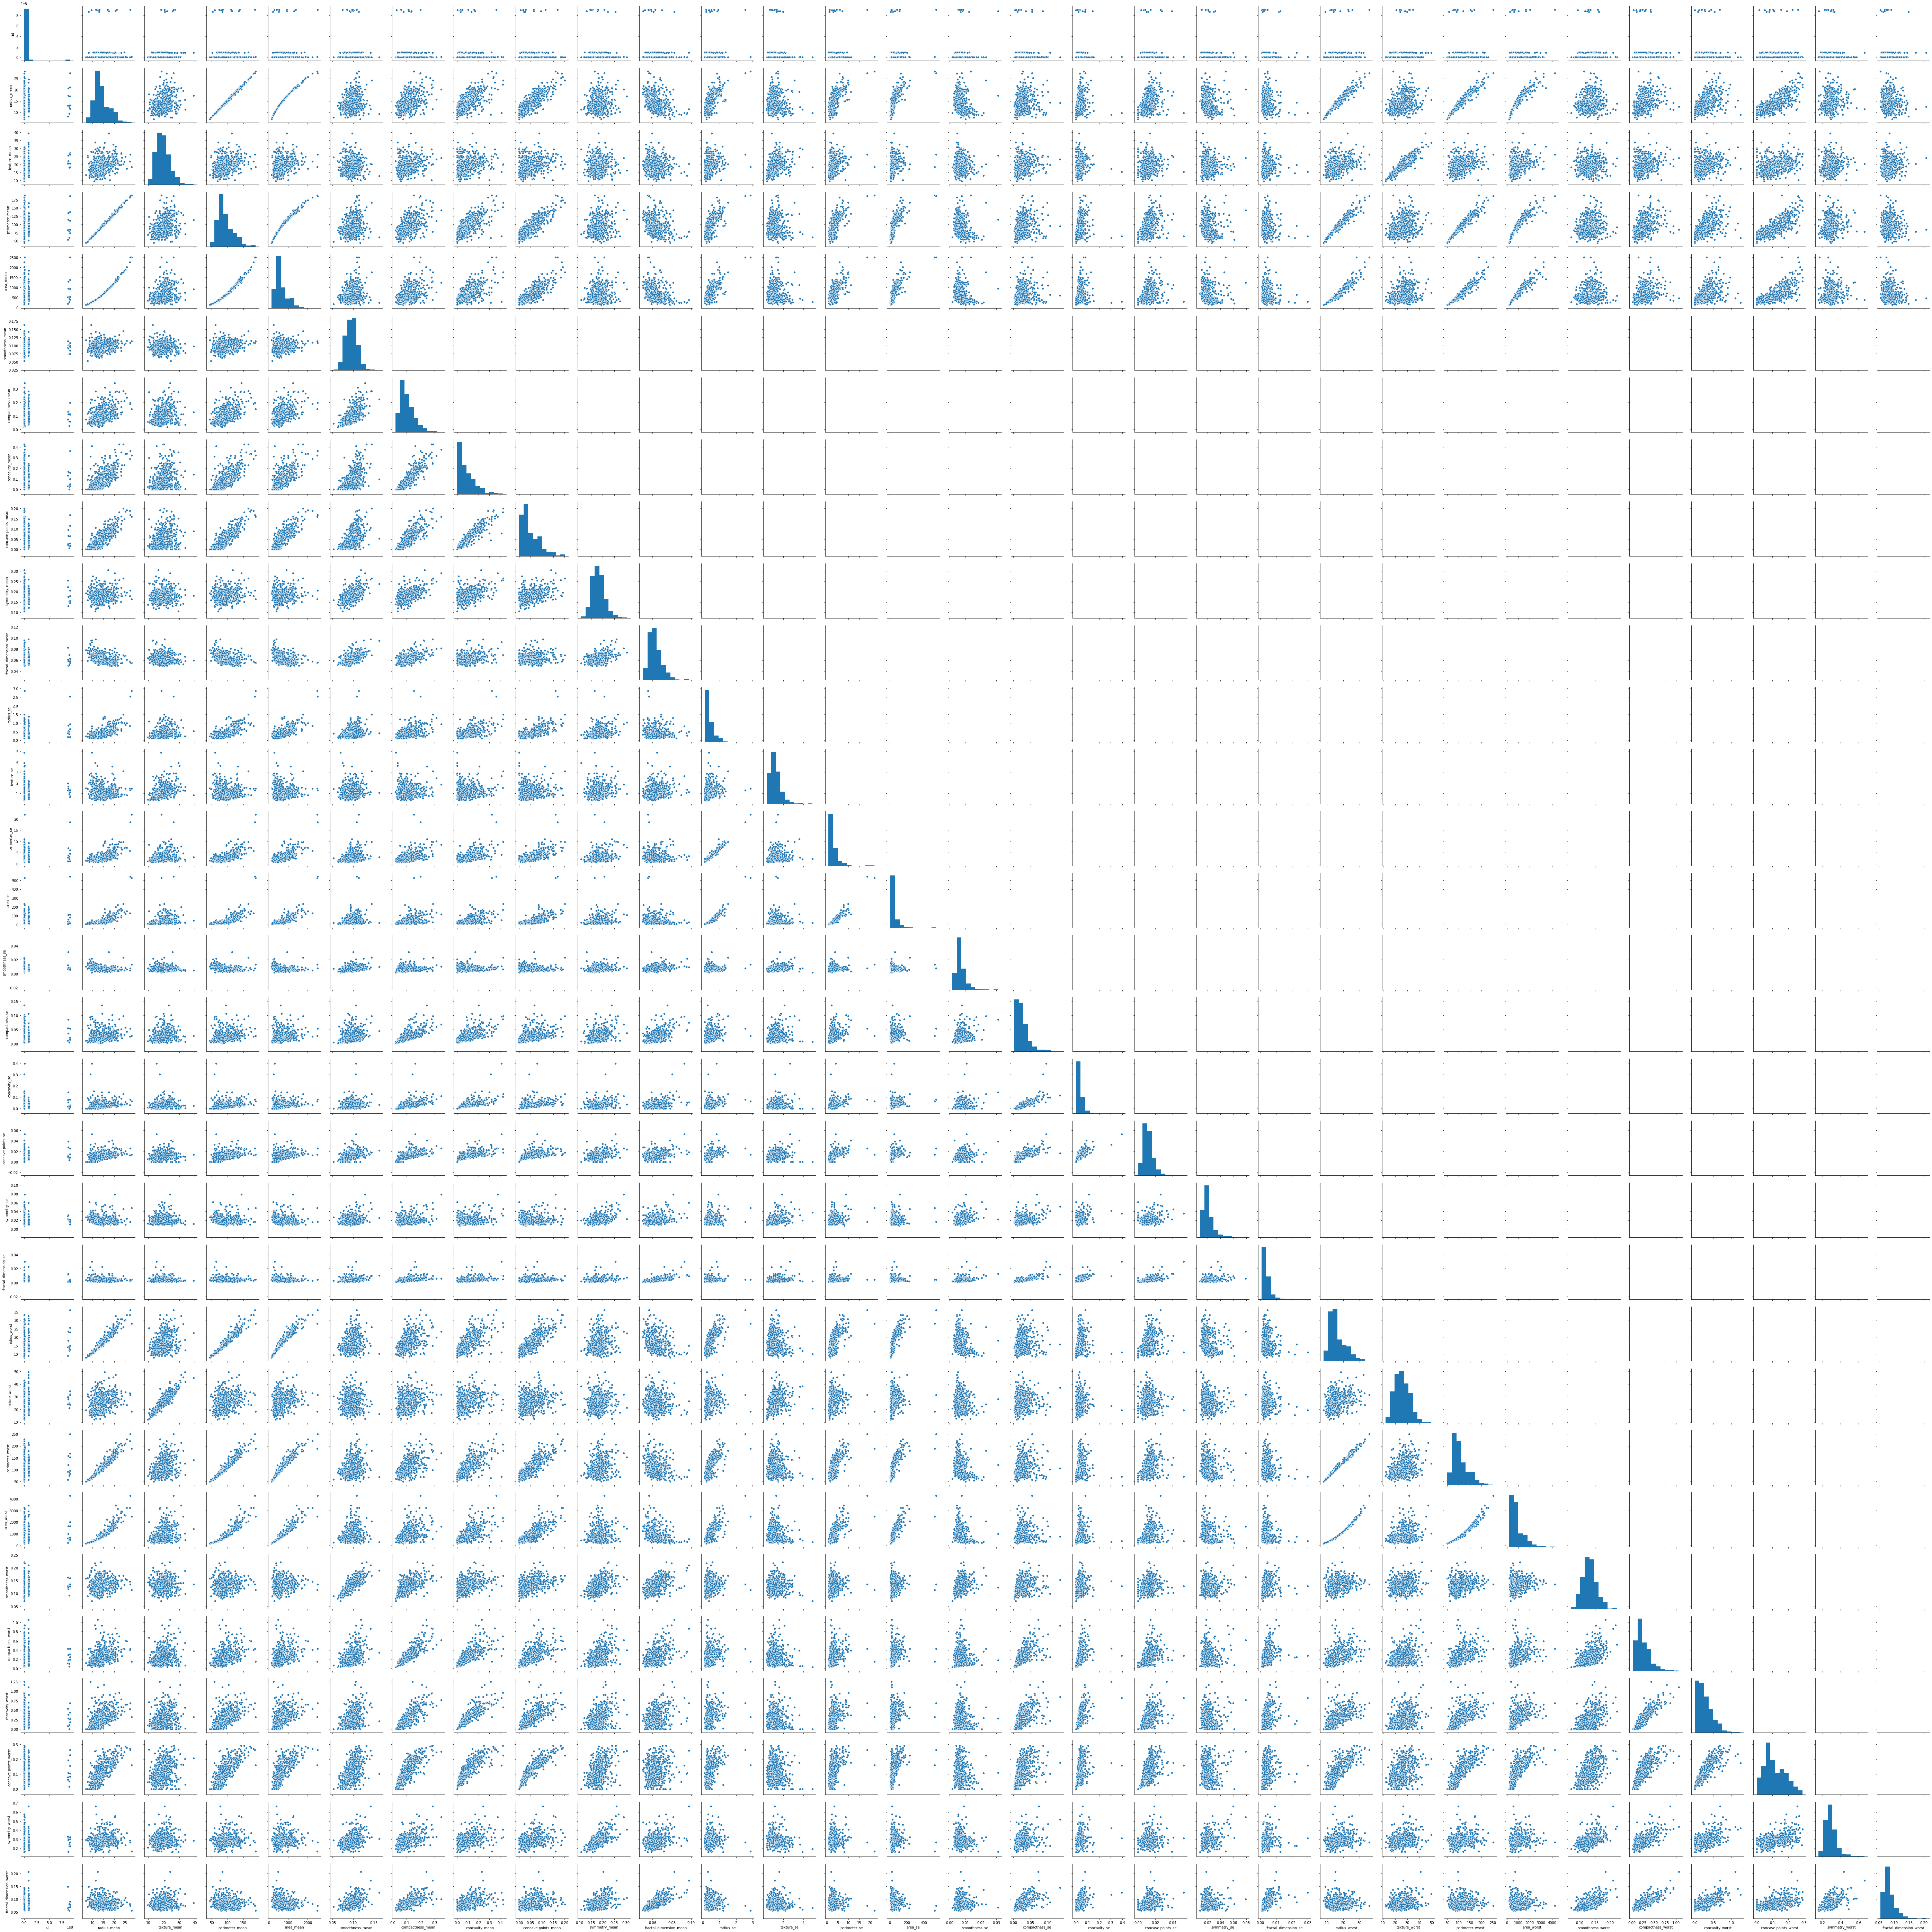

In [3]:
# This takes a really long time to run and I accidentally ran it again, so run it if you dare.

import seaborn as sns
sns.pairplot(df)
plt.show();

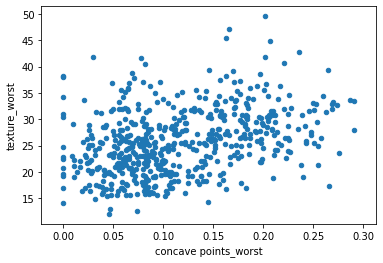

In [19]:
df.plot.scatter(x='concave points_worst', y='texture_worst')

In [20]:
cluster_data = df[['concave points_worst', 'texture_worst']]

In [21]:
scaler = StandardScaler()
scaler.fit(cluster_data)
cluster_data = pd.DataFrame(scaler.transform(cluster_data), columns=['texture_worst', 'concave_points_worst'])

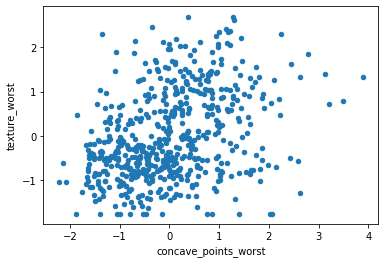

In [22]:
cluster_data.plot.scatter(x='concave_points_worst', y='texture_worst');

In [23]:
sumOfSquaredDistances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(cluster_data)
    sumOfSquaredDistances.append(km.inertia_)

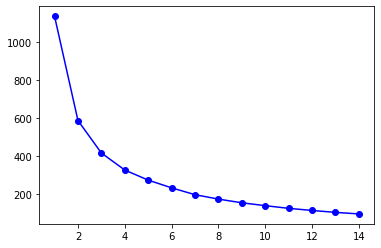

In [24]:
plt.plot(K, sumOfSquaredDistances, 'bo-')
plt.show();

# I'll try 2

In [25]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_data)
labels = kmeans.labels_

cluster_data['clusters'] = pd.Series(labels).values

cluster_data.head()

texture_worst  concave_points_worst  clusters
0       2.296076             -1.359293         1
1       1.087084             -0.369203         1
2       1.955000             -0.023974         1
3       2.175786              0.133984         1
4       0.729259             -1.466770         0

''

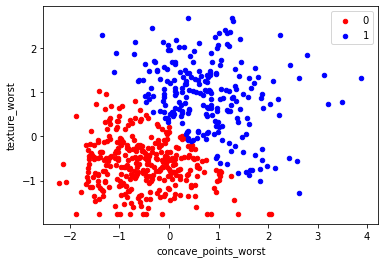

In [32]:
colors = {0: 'blue', 1: 'red'}
fig, ax = plt.subplots()
grouped = cluster_data.groupby('clusters')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', y='texture_worst', label=key, color=colors[key])
;

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

''

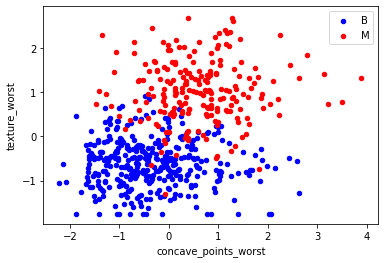

In [33]:
cluster_data['diagnosis'] = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")['diagnosis']
colors = {'M': 'red', 'B': 'blue'}
fig, ax = plt.subplots()
grouped = cluster_data.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', y='texture_worst', label=key, color=colors[key])
;

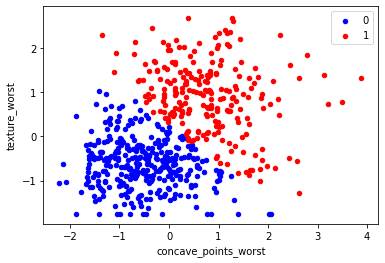

In [34]:
colors = {0: 'blue', 1: 'red'}
fig, ax = plt.subplots()
grouped = cluster_data.groupby('clusters')
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x='concave_points_worst', y='texture_worst', label=key, color=colors[key])
plt.show();

In [35]:
cluster_data.diagnosis = cluster_data.diagnosis.map({'M': 1, 'B': 0})
print(((cluster_data.diagnosis==cluster_data.clusters).sum() / len(cluster_data.diagnosis)) * 100, '%', sep='')

88.75219683655537%


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [37]:
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project